In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | bolshiye chapurniki
City not found. Skipping...
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | kavaratti
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | corumba
Processing Record 15 of Set 1 | huarmey
Processing Record 16 of Set 1 | talnakh
Processing Record 17 of Set 1 | bud
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | hithadhoo
Processing

Processing Record 35 of Set 4 | tomatlan
Processing Record 36 of Set 4 | rawah
Processing Record 37 of Set 4 | tuatapere
Processing Record 38 of Set 4 | saleilua
City not found. Skipping...
Processing Record 39 of Set 4 | promyshlennaya
Processing Record 40 of Set 4 | high level
Processing Record 41 of Set 4 | viedma
Processing Record 42 of Set 4 | savannah bight
Processing Record 43 of Set 4 | sorong
Processing Record 44 of Set 4 | beringovskiy
Processing Record 45 of Set 4 | illapel
Processing Record 46 of Set 4 | norman wells
Processing Record 47 of Set 4 | lasa
Processing Record 48 of Set 4 | baykit
Processing Record 49 of Set 4 | seminole
Processing Record 50 of Set 4 | carutapera
Processing Record 1 of Set 5 | grand gaube
Processing Record 2 of Set 5 | japura
Processing Record 3 of Set 5 | cherskiy
Processing Record 4 of Set 5 | kholodnyy
Processing Record 5 of Set 5 | saldanha
Processing Record 6 of Set 5 | arman
Processing Record 7 of Set 5 | kambanis
City not found. Skipping..

City not found. Skipping...
Processing Record 26 of Set 8 | sarajevo
Processing Record 27 of Set 8 | ponta delgada
Processing Record 28 of Set 8 | adrar
Processing Record 29 of Set 8 | changping
Processing Record 30 of Set 8 | nishihara
Processing Record 31 of Set 8 | yelizovo
Processing Record 32 of Set 8 | soyo
Processing Record 33 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 34 of Set 8 | ewa beach
Processing Record 35 of Set 8 | pasni
Processing Record 36 of Set 8 | salamiyah
Processing Record 37 of Set 8 | preobrazheniye
Processing Record 38 of Set 8 | sinnamary
Processing Record 39 of Set 8 | sao filipe
Processing Record 40 of Set 8 | rocha
Processing Record 41 of Set 8 | bathsheba
Processing Record 42 of Set 8 | mirina
City not found. Skipping...
Processing Record 43 of Set 8 | paredon
Processing Record 44 of Set 8 | corralillo
Processing Record 45 of Set 8 | trincomalee
Processing Record 46 of Set 8 | pampas
Processing Record 47 of Set 8 | cam

Processing Record 12 of Set 12 | warqla
City not found. Skipping...
Processing Record 13 of Set 12 | riberalta
Processing Record 14 of Set 12 | marand
Processing Record 15 of Set 12 | gwadar
Processing Record 16 of Set 12 | changji
Processing Record 17 of Set 12 | aitape
Processing Record 18 of Set 12 | ahipara
Processing Record 19 of Set 12 | canutama
Processing Record 20 of Set 12 | correntina
Processing Record 21 of Set 12 | spring hill
Processing Record 22 of Set 12 | akyab
Processing Record 23 of Set 12 | storm lake
Processing Record 24 of Set 12 | castrovillari
Processing Record 25 of Set 12 | terrace
Processing Record 26 of Set 12 | atambua
Processing Record 27 of Set 12 | la palma
Processing Record 28 of Set 12 | mama
Processing Record 29 of Set 12 | qasigiannguit
Processing Record 30 of Set 12 | lorut
Processing Record 31 of Set 12 | ulubaria
City not found. Skipping...
Processing Record 32 of Set 12 | dongsheng
Processing Record 33 of Set 12 | codrington
Processing Record 34 

In [68]:
len(city_data)

568

In [69]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luderitz,-26.6481,15.1594,69.94,75,18,10.31,NA,2022-02-02 15:20:28
1,Cabo San Lucas,22.8909,-109.9124,69.51,54,40,9.22,MX,2022-02-02 15:20:29
2,Avarua,-21.2078,-159.7750,77.05,88,75,10.36,CK,2022-02-02 15:20:29
3,Rikitea,-23.1203,-134.9692,77.50,72,46,6.73,PF,2022-02-02 15:20:30
4,Torbay,47.6666,-52.7314,28.89,81,75,6.91,CA,2022-02-02 15:20:30
5,Nikolskoye,59.7035,30.7861,22.89,99,98,1.72,RU,2022-02-02 15:20:31
6,Kavaratti,10.5669,72.6420,80.98,68,5,12.55,IN,2022-02-02 15:20:31
7,Bluff,-46.6000,168.3333,56.80,87,100,18.52,NZ,2022-02-02 15:20:31
8,Corumba,-19.0092,-57.6533,89.31,66,75,8.05,BR,2022-02-02 15:20:32
9,Huarmey,-10.0681,-78.1522,74.62,73,97,10.25,PE,2022-02-02 15:20:32


In [70]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [71]:
city_data_df = city_data_df[new_column_order]

In [72]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Luderitz,NA,2022-02-02 15:20:28,-26.6481,15.1594,69.94,75,18,10.31
1,Cabo San Lucas,MX,2022-02-02 15:20:29,22.8909,-109.9124,69.51,54,40,9.22
2,Avarua,CK,2022-02-02 15:20:29,-21.2078,-159.7750,77.05,88,75,10.36
3,Rikitea,PF,2022-02-02 15:20:30,-23.1203,-134.9692,77.50,72,46,6.73
4,Torbay,CA,2022-02-02 15:20:30,47.6666,-52.7314,28.89,81,75,6.91


In [73]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [74]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

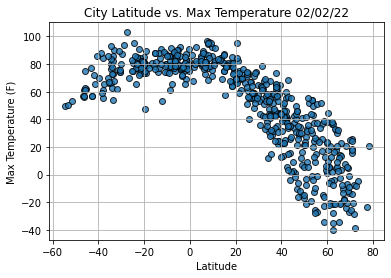

In [75]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

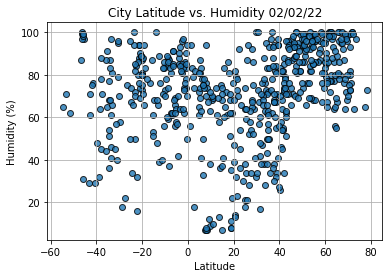

In [76]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

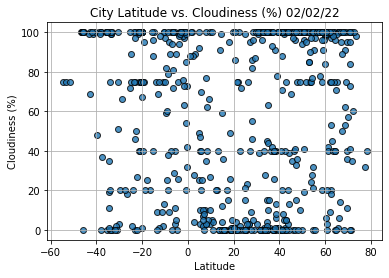

In [77]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

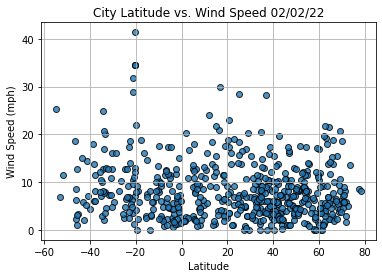

In [78]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [85]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [87]:
index13 = city_data_df.loc[13]
index13

City                    Hithadhoo
Country                        MV
Date          2022-02-02 15:20:34
Lat                          -0.6
Lng                       73.0833
Max Temp                     82.6
Humidity                       70
Cloudiness                     32
Wind Speed                   7.25
Name: 13, dtype: object

In [88]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
563     True
564     True
565     True
566     True
567    False
Name: Lat, Length: 568, dtype: bool

In [90]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Cabo San Lucas,MX,2022-02-02 15:20:29,22.8909,-109.9124,69.51,54,40,9.22
4,Torbay,CA,2022-02-02 15:20:30,47.6666,-52.7314,28.89,81,75,6.91
5,Nikolskoye,RU,2022-02-02 15:20:31,59.7035,30.7861,22.89,99,98,1.72
6,Kavaratti,IN,2022-02-02 15:20:31,10.5669,72.6420,80.98,68,5,12.55
10,Talnakh,RU,2022-02-02 15:20:33,69.4865,88.3972,-0.80,98,95,6.08


In [91]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

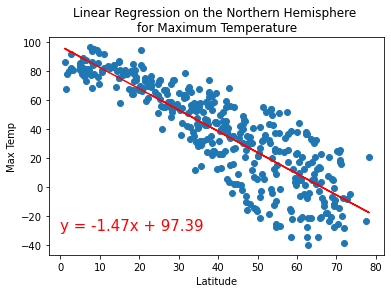

In [120]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(0,-30))

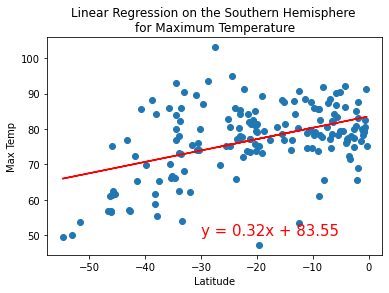

In [126]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-30,50))

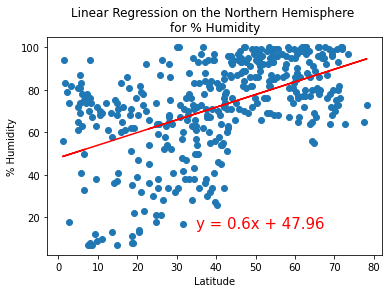

In [132]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(35,15))

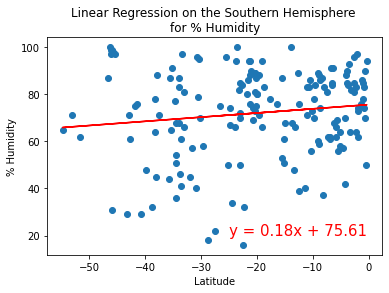

In [130]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-25,20))

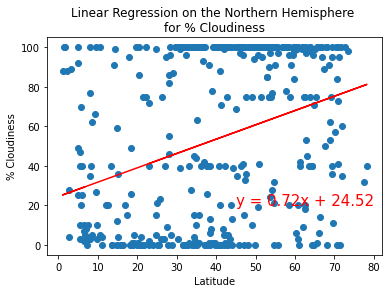

In [137]:
# Linear regression on the Norther Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(45,20))

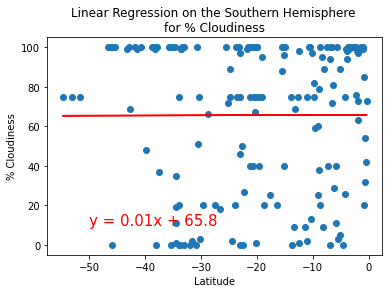

In [141]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,10))

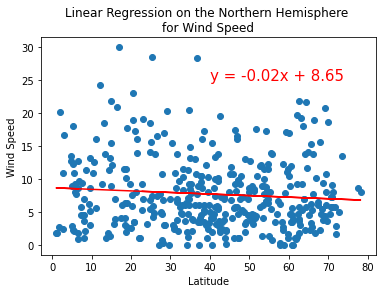

In [145]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,25))

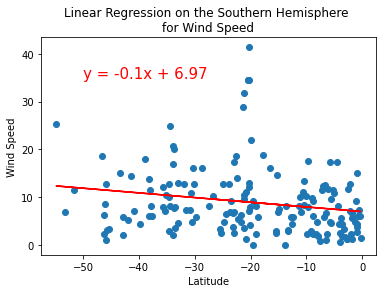

In [147]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))